In [1]:
import sys
sys.path.insert(0, '..')

from multipliers import (
    NaiveMultiplier, 
    RSRBinaryMultiplier, 
    RSRTernaryMultiplier,
    RSRPlusPlusBinaryMultiplier,
    RSRPlusPlusTernaryMultiplier
)

import math
import random
import time
from functools import wraps
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator

import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
def generate_random_binary_matrix(n):
    # Generate a random binary matrix of size n x n
    binary_matrix = np.random.randint(2, size=(n, n))
    return binary_matrix

def generate_random_ternary_matrix(n):
    ternary_matrix = np.random.randint(low=-1, high=2, size=(n, n))
    return ternary_matrix

def generate_random_int_vector(size, low=0, high=100):
    random_vector = np.random.randint(low, high, size)
    return random_vector

In [3]:
n_s = [2**i for i in range(11, 16)]

In [4]:
vectors = [generate_random_int_vector(n) for n in n_s]
# binary_matrices = [generate_random_binary_matrix(n) for n in n_s]
ternary_matrices = [generate_random_ternary_matrix(n) for n in n_s]

## Binary

In [5]:
naive_times = []
rsr_times = []
rsrpp_times = []


    
for i, (v, A) in enumerate(zip(vectors, binary_matrices)):
    k = max(int(math.log2(n_s[i]) - math.log(math.log2(n_s[i]))) - 5, 3)
    print(f"k: {k} | {i + 1} / {len(n_s)}")
    rsr = RSRBinaryMultiplier(A, k=k)

    print("rsr: ", end="")
    rsr_time = %timeit -r 4 -o rsr.multiply(v)  
    rsr_times.append(rsr_time.best)  

for i, (v, A) in enumerate(zip(vectors, binary_matrices)):
    k = max(int(math.log2(n_s[i]) - math.log(math.log2(n_s[i]))) - 5, 3)
    print(f"k: {k} | {i + 1} / {len(n_s)}")
    rsrpp = RSRPlusPlusBinaryMultiplier(A, k=k)

    print("rsrpp: ", end="")
    rsrpp_time = %timeit -r 4 -o rsrpp.multiply(v)
    rsrpp_times.append(rsrpp_time.best)


for i, (v, A) in enumerate(zip(vectors, binary_matrices)):
    print(f"k: {math.log2(n_s[i])} | {i + 1} / {len(n_s)}")
    naive = NaiveMultiplier(A)
    
    print("naive: ", end="")
    
    naive_time = %timeit -r 4 -o naive.multiply(v)
    naive_times.append(naive_time.best) 

naive_times = np.array(naive_times)
rsr_times = np.array(rsr_times)
rsrpp_times = np.array(rsrpp_times)

for length, naive_time, rsr_time, rsrpp_time in zip([len(v) for v in vectors], naive_times, rsr_times, rsrpp_times):
    print(f"Vector length: {length} | Naive time: {naive_time:.6f} seconds | RSR time: {rsr_time:.6f} seconds | RSRPP time: {rsrpp_time:.6f}")


k: 3 | 1 / 6
rsr: 14 ms ± 98 μs per loop (mean ± std. dev. of 4 runs, 100 loops each)
k: 4 | 2 / 6
rsr: 34.6 ms ± 190 μs per loop (mean ± std. dev. of 4 runs, 10 loops each)
k: 5 | 3 / 6
rsr: 90.4 ms ± 533 μs per loop (mean ± std. dev. of 4 runs, 10 loops each)
k: 6 | 4 / 6
rsr: 284 ms ± 1.04 ms per loop (mean ± std. dev. of 4 runs, 1 loop each)
k: 7 | 5 / 6
rsr: 952 ms ± 1.81 ms per loop (mean ± std. dev. of 4 runs, 1 loop each)
k: 8 | 6 / 6
rsr: 3.66 s ± 3.81 ms per loop (mean ± std. dev. of 4 runs, 1 loop each)
k: 3 | 1 / 6
rsrpp: 21.4 ms ± 61 μs per loop (mean ± std. dev. of 4 runs, 10 loops each)
k: 4 | 2 / 6
rsrpp: 45 ms ± 95.1 μs per loop (mean ± std. dev. of 4 runs, 10 loops each)
k: 5 | 3 / 6
rsrpp: 110 ms ± 337 μs per loop (mean ± std. dev. of 4 runs, 10 loops each)
k: 6 | 4 / 6
rsrpp: 303 ms ± 408 μs per loop (mean ± std. dev. of 4 runs, 1 loop each)
k: 7 | 5 / 6
rsrpp: 985 ms ± 2.91 ms per loop (mean ± std. dev. of 4 runs, 1 loop each)
k: 8 | 6 / 6
rsrpp: 3.56 s ± 6.3 ms pe

In [6]:
vector_lengths = np.array(n_s) 

data = {
    'Vector Length': vector_lengths,
    'Naive Time (s)': naive_times,
    'RSR Time (s)': rsr_times,
    'RSR PP (s)': rsrpp_times
}
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
output_file = 'multiplication_times_binary_plus_2.csv'
df.to_csv(output_file, index=False)

print(f"Execution times saved to {output_file}")


Execution times saved to multiplication_times_binary_plus_2.csv


## Ternary

In [5]:
naive_times_ternay = []
rsr_times_ternary = []
rsrpp_times_ternary = []


    
for i, (v, A) in enumerate(zip(vectors, ternary_matrices)):
    k = max(int(math.log2(n_s[i]) - math.log(math.log2(n_s[i]))) - 5, 3)
    print(f"k: {k} | {i + 1} / {len(n_s)}")
    rsr = RSRTernaryMultiplier(A, k=k)

    print("rsr: ", end="")
    rsr_time = %timeit -r 4 -o rsr.multiply(v)  
    rsr_times_ternary.append(rsr_time.best)  

for i, (v, A) in enumerate(zip(vectors, ternary_matrices)):
    k = max(int(math.log2(n_s[i]) - math.log(math.log2(n_s[i]))) - 5, 3)
    print(f"k: {k} | {i + 1} / {len(n_s)}")
    rsrpp = RSRPlusPlusTernaryMultiplier(A, k=k)

    print("rsrpp: ", end="")
    rsrpp_time = %timeit -r 4 -o rsrpp.multiply(v)
    rsrpp_times_ternary.append(rsrpp_time.best)


for i, (v, A) in enumerate(zip(vectors, ternary_matrices)):
    print(f"k: {math.log2(n_s[i])} | {i + 1} / {len(n_s)}")
    naive = NaiveMultiplier(A)
    
    print("naive: ", end="")
    
    naive_time = %timeit -r 4 -o naive.multiply(v)
    naive_times_ternay.append(naive_time.best) 

naive_times_ternay = np.array(naive_times_ternay)
rsr_times_ternary = np.array(rsr_times_ternary)
rsrpp_times_ternary = np.array(rsrpp_times_ternary)

for length, naive_time, rsr_time, rsrpp_time in zip([len(v) for v in vectors], naive_times_ternay, rsr_times_ternary, rsrpp_times_ternary):
    print(f"Vector length: {length} | Naive time: {naive_time:.6f} seconds | RSR time: {rsr_time:.6f} seconds | RSRPP time: {rsrpp_time:.6f}")


k: 3 | 1 / 5
rsr: 27 ms ± 37.1 μs per loop (mean ± std. dev. of 4 runs, 10 loops each)
k: 4 | 2 / 5
rsr: 66.4 ms ± 209 μs per loop (mean ± std. dev. of 4 runs, 10 loops each)
k: 5 | 3 / 5
rsr: 179 ms ± 611 μs per loop (mean ± std. dev. of 4 runs, 10 loops each)
k: 6 | 4 / 5
rsr: 559 ms ± 548 μs per loop (mean ± std. dev. of 4 runs, 1 loop each)
k: 7 | 5 / 5
rsr: 1.9 s ± 3.53 ms per loop (mean ± std. dev. of 4 runs, 1 loop each)
k: 3 | 1 / 5
rsrpp: 44.7 ms ± 98.8 μs per loop (mean ± std. dev. of 4 runs, 10 loops each)
k: 4 | 2 / 5
rsrpp: 91.4 ms ± 401 μs per loop (mean ± std. dev. of 4 runs, 10 loops each)
k: 5 | 3 / 5
rsrpp: 218 ms ± 1.56 ms per loop (mean ± std. dev. of 4 runs, 1 loop each)
k: 6 | 4 / 5
rsrpp: 606 ms ± 2.3 ms per loop (mean ± std. dev. of 4 runs, 1 loop each)
k: 7 | 5 / 5


In [25]:

vector_lengths = np.array(n_s)  # Length of each vector

# speedup_ternary = naive_times_ternary / rsr_times_ternary


# Assuming vector_lengths, naive_times, and rsr_times are defined from the previous code
# Convert data to a DataFrame
data = {
    'Vector Length': vector_lengths,
    'Naive Time (s)': naive_times_ternary,
    'RSR Time (s)': rsr_times_ternary,
    'RSR PP': rsr_pp_times_ternary
}
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
output_file = 'multiplication_times_ternary_plus.csv'
df.to_csv(output_file, index=False)

print(f"Execution times saved to {output_file}")


Execution times saved to multiplication_times_ternary_plus.csv


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


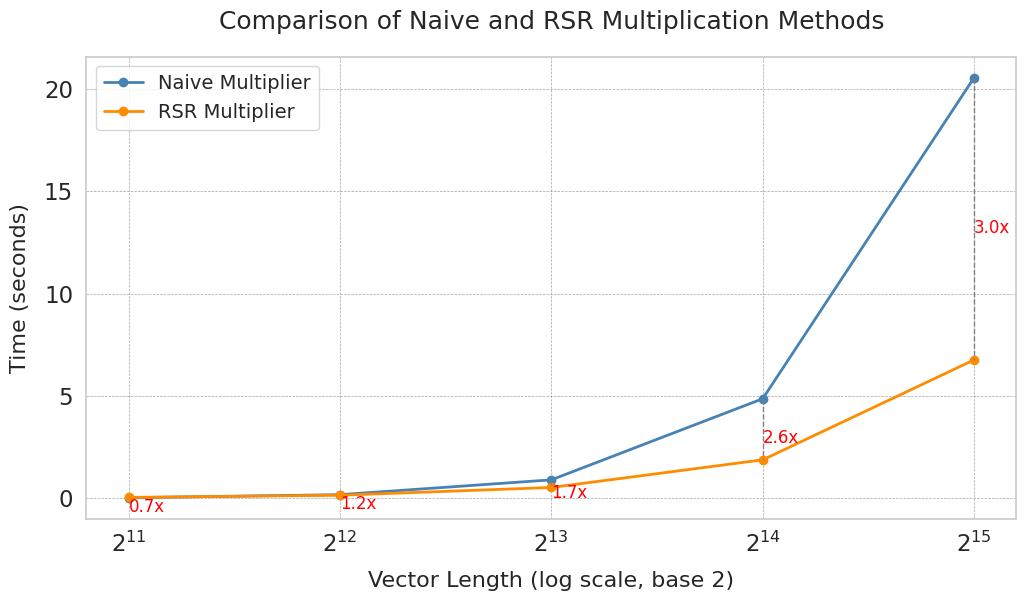

In [16]:


# Set Seaborn style and scaling
sns.set_theme(style="whitegrid")
sns.set_context("notebook", font_scale=1.5)

# Example data (replace these with actual measurements)
vector_lengths = np.array([len(v) for v in vectors])  # Length of each vector

# Create the plot with improved aesthetics
plt.figure(figsize=(12, 6))

# Plot times for NaiveMultiplier and RSRMultiplier
plt.plot(vector_lengths, naive_times_ternary, label='Naive Multiplier', marker='o', color='steelblue', markersize=6, linewidth=2)
plt.plot(vector_lengths, rsr_times_ternary, label='RSR Multiplier', marker='o', color='darkorange', markersize=6, linewidth=2)

# Draw lines connecting Naive and RSR times for each vector length to show speedup visually
for i in range(len(vector_lengths)):
    plt.plot([vector_lengths[i], vector_lengths[i]], [naive_times_ternary[i], rsr_times_ternary[i]], 
             color='gray', linestyle='--', linewidth=1)

# Label the points with the speedup factor
for i, length in enumerate(vector_lengths):
    plt.text(length, (naive_times_ternary[i] + rsr_times_ternary[i]) / 2, f"{speedup_ternary[i]:.1f}x",
             ha='left', va="top", color='red', fontsize=12)

# Configure the plot aesthetics
plt.xscale('log', base=2)
plt.xlabel('Vector Length (log scale, base 2)', fontsize=16, labelpad=10)
plt.ylabel('Time (seconds)', fontsize=16, labelpad=10)
plt.title('Comparison of Naive and RSR Multiplication Methods', fontsize=18, pad=20)
plt.legend(fontsize=14)

# Configure x-axis ticks for log base 2 and a clean grid
plt.gca().xaxis.set_major_locator(LogLocator(base=2))
plt.grid(True, which="both", ls="--", lw=0.5, color='gray', alpha=0.7)

# Save as EPS and display
plt.savefig("ternary.eps", format='eps', bbox_inches='tight')
plt.show()
